In [26]:
import json
import PathFinder_v2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [37]:
file = open("DataGraphs/NodesGraph.json")
NodesGraph = json.load(file)

file = open("DataGraphs/RunsLiftsGraph.json")
RunsLiftsGraph = json.load(file)

In [38]:
NodesGraph.get("76aa1422-5227-439e-ac0d-23d3bb128b7b")

{'58058bd2-5d98-43fb-aced-9e5a19390ba2': {'duration': 720.0,
  'difficulty': 'lift',
  'distance_prop': 0.9999829924805353}}

In [39]:
#startingPointNode = 'f4946711-6818-4375-96ef-e487b025c61c' # lac blanc lift
startingPointNode = '76aa1422-5227-439e-ac0d-23d3bb128b7b' # funitel pecelt start

#runsInput = ['Beranger','Christine','Croissant']
#runsInput = ['0602c22d0ee93ab4320c45ce4d9d3cea5b49f867', 'f9214995594b42205bf550a2ea2433ae66a4dbd0', 'a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a']
#runsInput = ['a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a'] # croissant
runsInput = ['327610f1acb523e9c5c26e69b849fb180f9939b7', '0602c22d0ee93ab4320c45ce4d9d3cea5b49f867', 'a0bb99c174db2bf009db1d1dbf8b918fe0a16b4a'] #lac blanc and beranger, croissant

weights = {
        "lift": 1.4,
        "novice": 1,
        "easy": 1.2,
        "intermediate": 1.4,
        "advanced": 1.6
    }


In [40]:
def GetStartEndPairs(runsInput, RunsLiftsGraph):
    startEndPairsList = []
    for runID in runsInput:
        if runID in RunsLiftsGraph:
            startNode = RunsLiftsGraph.get(runID).get("point_ids")[0]
            endNode = RunsLiftsGraph.get(runID).get("point_ids")[-1]
            startEndPairs = [startNode, endNode]
            startEndPairsList.append(startEndPairs)

    return startEndPairsList


def AppendStartNodeToPermutations(permutations, startingNode):
    AppendedPermutationsList = []
    for permutation in permutations:
        sumPerms = sum(permutation, [])
        sumPerms.insert(0,startingNode)
        AppendedPermutationsList.append(sumPerms)

    return AppendedPermutationsList

In [41]:
selectedDefaultSkiRunsStartEndPairs = GetStartEndPairs(runsInput, RunsLiftsGraph)

selectedDefaultSkiRunsPermutations = PathFinder_v2.GetAllPermutations(selectedDefaultSkiRunsStartEndPairs)

appendedStartNodeToEachPermutation = AppendStartNodeToPermutations(selectedDefaultSkiRunsPermutations, startingPointNode)
appendedStartNodeToEachPermutation

[['76aa1422-5227-439e-ac0d-23d3bb128b7b',
  '7e0dfbb7-9bb8-4b51-9a76-a08870e61111',
  '19b61770-d2b0-44c4-86b0-6b93a426a1c7',
  'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e',
  '6779ff15-74fd-4e6c-8814-623e12d3029a',
  '6bdff8e6-9533-48e1-ab5a-4714881d6476',
  'b8e94b87-178f-468c-9642-43e6536595df'],
 ['76aa1422-5227-439e-ac0d-23d3bb128b7b',
  '7e0dfbb7-9bb8-4b51-9a76-a08870e61111',
  '19b61770-d2b0-44c4-86b0-6b93a426a1c7',
  '6bdff8e6-9533-48e1-ab5a-4714881d6476',
  'b8e94b87-178f-468c-9642-43e6536595df',
  'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e',
  '6779ff15-74fd-4e6c-8814-623e12d3029a'],
 ['76aa1422-5227-439e-ac0d-23d3bb128b7b',
  'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e',
  '6779ff15-74fd-4e6c-8814-623e12d3029a',
  '7e0dfbb7-9bb8-4b51-9a76-a08870e61111',
  '19b61770-d2b0-44c4-86b0-6b93a426a1c7',
  '6bdff8e6-9533-48e1-ab5a-4714881d6476',
  'b8e94b87-178f-468c-9642-43e6536595df'],
 ['76aa1422-5227-439e-ac0d-23d3bb128b7b',
  'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e',
  '6779ff15-74fd-4e6c-8814-623e

In [42]:
i = 0
perm = appendedStartNodeToEachPermutation[0] 

PathFinder_v2.AStar(NodesGraph, perm[i], perm[i + 1], weights)

['76aa1422-5227-439e-ac0d-23d3bb128b7b',
 '58058bd2-5d98-43fb-aced-9e5a19390ba2',
 'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e',
 '7e0dfbb7-9bb8-4b51-9a76-a08870e61111']

In [ ]:
EndToStartPairs = []
shortestPathList = []
shortestDisPathForEachPermDict = {}
shortestPathListForEachPermList = []
totalDistance = 0
totalPath = []
       
perm = appendedStartNodeToEachPermutation     
                                                #starting value of seq   |   length of list   |   increment
for i in range(0, len(perm), 2):        #range(0,                |        len(perm)   |     , 2)
                
                           
    if i + 1 < len(perm):
        pair = (perm[i], perm[i + 1])
        EndToStartPairs.append(pair)

        print("-----------------------Pair: ", pair)
                    
                #Do Astar from here
        shortestPathForCurrentPermutation = PathFinder_v2.AStar(NodesGraph, perm[i], perm[i + 1], weights)
                #print("Shorted path for current permutation:" , shortestPathForCurrentPermutation)

        if shortestPathForCurrentPermutation is not None:
            distance = PathFinder_v2.CalculateTotalDistance(shortestPathForCurrentPermutation, NodesGraph, weights) #Calculates path distance for current pair in permutation

            shortestDistancePathForCurrentPermutationDict = {'distance': distance, 'path': shortestPathForCurrentPermutation}
            shortestPathList.append(shortestDistancePathForCurrentPermutationDict)


            totalPath.append(shortestPathForCurrentPermutation)    #Total current path to each pair in the permutation  
            totalDistance += distance
                        
                    
        else:
            print("There is no path")

        shortestDisPathForEachPermDict = {'distance': totalDistance, 'path': totalPath}
                #print(shortestDisPathForEachPermDict)


    else:
                #Add the last node after the Astar result TODO
        EndToStartPairs.append(perm[i]) #only adds one node (maybe insert this as a seperate var?)  

            
print("Total Distance: ", totalDistance, "| Total Path: ", totalPath)
shortestPathListForEachPermList.append(shortestDisPathForEachPermDict)

In [44]:
if __name__ == "__main__":

    selectedDefaultSkiRunsStartEndPairs = GetStartEndPairs(runsInput, RunsLiftsGraph)

    selectedDefaultSkiRunsPermutations = PathFinder_v2.GetAllPermutations(selectedDefaultSkiRunsStartEndPairs)

    appendedStartNodeToEachPermutation = AppendStartNodeToPermutations(selectedDefaultSkiRunsPermutations, startingPointNode)


    EndToStartPairs = []
    shortestPathList = []
    shortestDisPathForEachPermDict = {}
    shortestPathListForEachPermList = []


    for perm in appendedStartNodeToEachPermutation:
        totalDistance = 0
        totalPath = []
                                                #starting value of seq   |   length of list   |   increment
        for i in range(0, len(perm), 2):        #range(0,                |        len(perm)   |     , 2)
                
                
                
            if i + 1 < len(perm):
                pair = (perm[i], perm[i + 1])
                EndToStartPairs.append(pair)

                print("-----------------------Pair: ", pair)
                    
                #Do Astar from here
                shortestPathForCurrentPermutation = PathFinder_v2.AStar(NodesGraph, perm[i], perm[i + 1], weights)
                #print("Shorted path for current permutation:" , shortestPathForCurrentPermutation)

                if shortestPathForCurrentPermutation is not None:
                    distance = PathFinder_v2.CalculateTotalDistance(shortestPathForCurrentPermutation, NodesGraph, weights) #Calculates path distance for current pair in permutation

                    shortestDistancePathForCurrentPermutationDict = {'distance': distance, 'path': shortestPathForCurrentPermutation}
                    shortestPathList.append(shortestDistancePathForCurrentPermutationDict)


                    totalPath.append(shortestPathForCurrentPermutation)    #Total current path to each pair in the permutation  
                    totalDistance += distance
                        
                    
                else:
                    print("There is no path")

                shortestDisPathForEachPermDict = {'distance': totalDistance, 'path': totalPath}
                

            else:
                #Add the last node after the Astar result TODO
                EndToStartPairs.append(perm[i]) #only adds one node (maybe insert this as a seperate var?)  

                
        print("Total Distance: ", totalDistance, "| Total Path: ", totalPath)
        shortestPathListForEachPermList.append(shortestDisPathForEachPermDict)
        
        for key, value in shortestDisPathForEachPermDict.items():
            print(key, ":", value)


minDistance = float('inf')
minPath = None

-----------------------Pair:  ('76aa1422-5227-439e-ac0d-23d3bb128b7b', '7e0dfbb7-9bb8-4b51-9a76-a08870e61111')
-----------------------Pair:  ('19b61770-d2b0-44c4-86b0-6b93a426a1c7', 'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e')
-----------------------Pair:  ('6779ff15-74fd-4e6c-8814-623e12d3029a', '6bdff8e6-9533-48e1-ab5a-4714881d6476')
Total Distance:  3228.6303990142655 | Total Path:  [['76aa1422-5227-439e-ac0d-23d3bb128b7b', '58058bd2-5d98-43fb-aced-9e5a19390ba2', 'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e', '7e0dfbb7-9bb8-4b51-9a76-a08870e61111'], ['19b61770-d2b0-44c4-86b0-6b93a426a1c7', 'd6b76c75-e661-45c4-8ee3-39ccefd4730c', '6df11114-a6f0-4e90-bae6-c6b252383306', '6779ff15-74fd-4e6c-8814-623e12d3029a', '9dc2c6db-12ad-4970-b5c2-4778f3f3c5c6', '6fa2de1e-d2c9-4036-ac34-4608460ef317', '484046fd-6f2f-4ae1-a0c4-b18347f97a31', 'cc8bb1e0-cc2f-4c13-89f8-36dd64aa9580', '891b6c3c-fdd3-4722-811d-6854a8b5e77b', '3b10399b-d0ea-4476-a969-8d80a64a30d3', '2c3635e0-91f3-48f6-a21e-54a3aad9c9ac', 'd2437e18-f0

In [45]:
# Iterate through each dictionary in the list
for shortestDisPathForEachPermDict in shortestPathListForEachPermList:

    distance = shortestDisPathForEachPermDict['distance']
    path = shortestDisPathForEachPermDict['path']

    # Compare distance with the current minimum distance
    if distance < minDistance:
        minDistance = distance 
        minPath = path
print("--------------------------------------------------------------------")
print("Smallest distance:", minDistance)
print("Corresponding path:", minPath)
print("--------------------------------------------------------------------")


--------------------------------------------------------------------
Smallest distance: 3013.1727351973886
Corresponding path: [['76aa1422-5227-439e-ac0d-23d3bb128b7b', '58058bd2-5d98-43fb-aced-9e5a19390ba2', 'edf44d11-ea1c-4aa3-bd38-f4b79c85e45e'], ['6779ff15-74fd-4e6c-8814-623e12d3029a', '9dc2c6db-12ad-4970-b5c2-4778f3f3c5c6', '6fa2de1e-d2c9-4036-ac34-4608460ef317', '484046fd-6f2f-4ae1-a0c4-b18347f97a31', 'cc8bb1e0-cc2f-4c13-89f8-36dd64aa9580', '891b6c3c-fdd3-4722-811d-6854a8b5e77b', '503c0d4c-10ab-473b-96a6-4ba3ddb65a8b', '9bc616a2-6514-4312-9ec2-ac4b1d6c96e0', '5a702876-4053-4bf3-b645-5959f97f0f19', '8b04589d-6192-466c-8355-431836106f23', '6bdff8e6-9533-48e1-ab5a-4714881d6476'], ['b8e94b87-178f-468c-9642-43e6536595df', '39efc508-1ceb-4471-b0c9-31420a4526c6', 'd6c31ee2-f45c-4ef2-a35a-ee97856cd847', '977c661a-579f-4e55-9b15-251d6e18da75', '484046fd-6f2f-4ae1-a0c4-b18347f97a31', 'cc8bb1e0-cc2f-4c13-89f8-36dd64aa9580', '891b6c3c-fdd3-4722-811d-6854a8b5e77b', '3b10399b-d0ea-4476-a969-8d

In [46]:
file = open("DataGraphs/LocationGraph.json")
LocationGraph = json.load(file)

runsliftmap = pd.read_pickle("/Users/sebastian/Documents/SkiNavApp/runsliftmap.pkl")

In [49]:
def plot_visited_nodes(runsliftmap, runsInput, minPath, idx_nodes_start=None, idx_nodes_end=None):
    """
    runsliftmap: dataframe with all the runs as linestrings
    runsInput: selected runs
    minPath: shortes path found by Astar
    idx_nodes_start: the index of the first node that should be annotate on the map
    idx_nodes_end: the index of the last node that should be annotate on the map
    """
    if idx_nodes_start is None:
        idx_nodes_start = 0 
    if idx_nodes_end is None:
        idx_nodes_end = len(sum(minPath, []))

    visited_nodes = []
    for node in sum(minPath, []):
        visited_nodes.append(tuple(LocationGraph.get(node)))
    visited_nodes = np.asarray(visited_nodes)
    nodes_data = gpd.GeoDataFrame(visited_nodes, geometry=gpd.points_from_xy(visited_nodes[:,1], visited_nodes[:,0])).reset_index() # lat, long
    
    fig, ax = plt.subplots(figsize=(12,14))
    runsliftmap.plot(ax=ax)
    runsliftmap[runsliftmap.id.isin(runsInput)].plot(ax=ax, color="lightgreen")
    nodes_data.geometry.plot(ax=ax, color="red")
    nodes_data.iloc[idx_nodes_start:idx_nodes_end].apply(lambda x: ax.annotate(text=x['index'], xy=x.geometry.centroid.coords[0], ha='right', size=8), axis=1)
    plt.show()

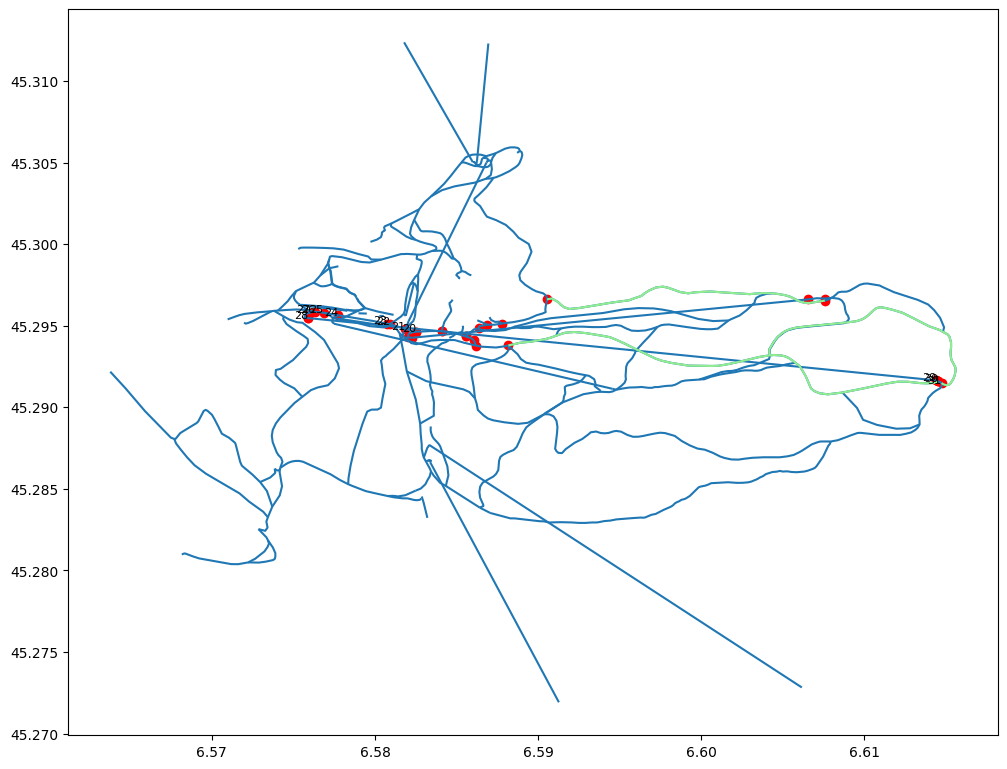

In [54]:
plot_visited_nodes(runsliftmap, runsInput, minPath, 20, )